<a href="https://colab.research.google.com/github/KanavAtre/NLP_NER_RecognitionModel/blob/main/Custom_NER_with_Spacy3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! pip install -U spacy -q

In [5]:
! python -m spacy info


============================== Info about spaCy ==============================

spaCy version    3.7.4                         
Location         /usr/local/lib/python3.10/dist-packages/spacy
Platform         Linux-6.1.58+-x86_64-with-glibc2.35
Python version   3.10.12                       
Pipelines        en_core_web_sm (3.7.1)        



In [ ]:
# !wget https://raw.githubusercontent.com/amrrs/custom-ner-with-spacy/main/pvr_training_data.json

--2021-12-30 17:13:03--  https://raw.githubusercontent.com/amrrs/custom-ner-with-spacy/main/pvr_training_data.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2829 (2.8K) [text/plain]
Saving to: ‘pvr_training_data.json’

pvr_training_data.j 100%[===================>]   2.76K  --.-KB/s    in 0s      

2021-12-30 17:13:03 (58.1 MB/s) - ‘pvr_training_data.json’ saved [2829/2829]



In [6]:
import spacy
from spacy.tokens import DocBin
from tqdm import tqdm


nlp = spacy.blank("en")
#nlp = spacy.blank("en_core_sm") # load a new spacy model
db = DocBin() # create a DocBin object

In [ ]:
nlp_object = spacy.load("en_core_web_sm")

In [8]:
import json
f = open('training_data.json')
TRAIN_DATA = json.load(f)

In [9]:
for text, annot in tqdm(TRAIN_DATA['annotations']):
    doc = nlp.make_doc(text)
    ents = []
    for start, end, label in annot["entities"]:
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents
    db.add(doc)

db.to_disk("./training_data.spacy") # save the docbin object

100%|██████████| 81/81 [00:00<00:00, 629.41it/s]


In [10]:
! python -m spacy init config config.cfg --lang en --pipeline ner --optimize efficiency

⚠ To generate a more effective transformer-based config (GPU-only),
install the spacy-transformers package and re-run this command. The config
generated now does not use transformers.
ℹ Generated config template specific for your use case
- Language: en
- Pipeline: ner
- Optimize for: efficiency
- Hardware: CPU
- Transformer: None
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [11]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [13]:
! python -m spacy train config.cfg --output ./ --paths.train ./training_data.spacy --paths.dev ./training_data.spacy

ℹ Saving to output directory: .
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     72.55    0.22    0.28    0.18    0.00
  4     200        683.01   3927.82   47.28   50.10   44.76    0.47
  8     400       8546.85   1680.15   91.73   91.81   91.65    0.92
 13     600        343.94    809.70   97.69   97.69   97.69    0.98
 19     800        395.27    431.23   99.29   99.47   99.11    0.99
 27    1000        326.98    296.78   99.55   99.82   99.29    1.00
 36    1200        751.82    247.18   98.76   98.41   99.11    0.99
 49    1400        413.74    230.16   99.56   99.47   99.64    1.00
 64    1600        266.16    179.82 

In [14]:
nlp_ner = spacy.load("/content/model-best")

In [15]:
doc = nlp_ner('''The global crypto market capitalisation tumbled 3.60 percent over the last 24 hours to $2.18 trillion while the total trading volume fell 6.79 percent to $95.77 billion.

While DeFi ($15.16 billion) accounted for 15.83 percent of the trading volume, stablecoins ($75.16 billion) made up 78.48 percent. The market dominance of Bitcoin rose 0.29 percent to 40.45 percent today morning. Bitcoin is currently trading at $46,560.09.

As for major cryptocurrencies, Bitcoin tumbled 2.46 percent to trade at Rs 37,49,173 while Ethereum fell 4.48 percent at Rs 2,93,527.4. Cardano declined 7.25 percent to Rs 105.4. Avalanche fell 8.77 percent to Rs 8,048, Polkadot tumbled 7.53 percent at Rs 2,137.04 and Litecoin dipped 1.04 percent to Rs 11,725.33 over the last 24 hours. Tether rose 0.12 percent to trade at Rs 80.18.

Memecoin SHIB fell 5.61 percent while Dogecoin decreased 4.29 percent to trade at Rs 13.56. LUNA fell around 6.39 percent to Rs 6,579.55.

Ethereum-based metaverse game The Sandbox co-founder and operations chief Sebastien Borget viewed the metaverse as a digital nation, saying that it’s validating to see his team’s idea for a community-owned, user-customisable online game world embraced by more people.

RELATED STORIES
  2021: A Year Of NFT Craze
  Elon Musk reveals who he thinks the mysterious Satoshi Nakamoto is
  Crypto Learn: How to read Crypto Charts?
“Every day, the map is different. There are new landowners and new communities that come and decide to build things next to each other. I feel like it's a digital nation—living and breathing. That's why it's exciting. It's culturally rich, it’s global, and it's accessible," he continued.

Per blockchain data site Glassnode, there are now 71,364,788 addresses holding some amount of Ethereum, the second-largest cryptocurrency by market capitalisation.

Meanwhile, a white hat hacker won a bug bounty. In early December, the person known as Leon Spacewalker on Twitter had helped Polygon avert a multibillion-dollar disaster. He reported an exploit in a critical Polygon smart contract that held more than nine billion MATIC tokens on Dec. 3, then worth around $20.2 billion. Core developers rushed a fix by Dec. 5. Spacewalker reportedly won a $2.2 million bug bounty, the blockchain network announced yesterday. ''') # input sample text

In [29]:
doc2 = nlp_ner('''
Modern A.I., Mr. Autor said, is a fundamentally different technology, opening the door to new possibilities. It can, he continued, change the economics of high-stakes decision-making so more people can take on some of the work that is now the province of elite, and expensive, experts like doctors, lawyers, software engineers and college professors. And if more people, including those without college degrees, can do more valuable work, they should be paid more, lifting more workers into the middle class.

The researcher, whom The Economist once called “the academic voice of the American worker,” started his career as a software developer and a leader of a computer-education nonprofit before switching to economics — and spending decades examining the impact of technology and globalization on workers and wages.

Mr. Autor, 59, was an author of an influential study in 2003 that concluded that 60 percent of the shift in demand favoring college-educated workers over the previous three decades was attributable to computerization. Later research examined the role of technology in wage polarization and in skewing employment growth toward low-wage service jobs.

Other economists view Mr. Autor’s latest treatise as a stimulating, though speculative, thought exercise.

“I’m a great admirer of David Autor’s work, but his hypothesis is only one possible scenario,” said Laura Tyson, a professor at the Haas School of Business at the University of California, Berkeley, who was chair of the Council of Economic Advisers during the Clinton administration. “There is broad agreement that A.I. will produce a productivity benefit, but how that translates into wages and employment is very uncertain.”

Editors’ Picks

How Many Easters Remain for This Century-Old Boys’ Choir School?

Jane Goodall Is More of a Dog Person, Actually

Work Is (Mostly) Work, Not Your Soapbox
SKIP ADVERTISEMENT

That uncertainty usually veers toward pessimism. Not just Silicon Valley doomsayers, but mainstream economists predict that many jobs, from call center workers to software developers, are at risk. In a report last year, Goldman Sachs concluded that generative A.I. could automate activities equivalent to 300 million full-time jobs globally.

''')

In [30]:
spacy.displacy.render(doc2, style="ent", jupyter=True) # display in Jupyter

In [35]:
from collections import Counter

entity_counts = Counter([ent.label_ for ent in doc2.ents])

total_entities = sum(entity_counts.values())

normalized_scores = {label: round(count / total_entities, 3) * 100 for label, count in entity_counts.items()}

In [36]:
normalized_scores

{'TECHNOLOGY': 12.0,
 'SCIENCE': 36.0,
 'SPORTS': 8.0,
 'BUSINESS': 24.0,
 'POLITICS': 20.0}

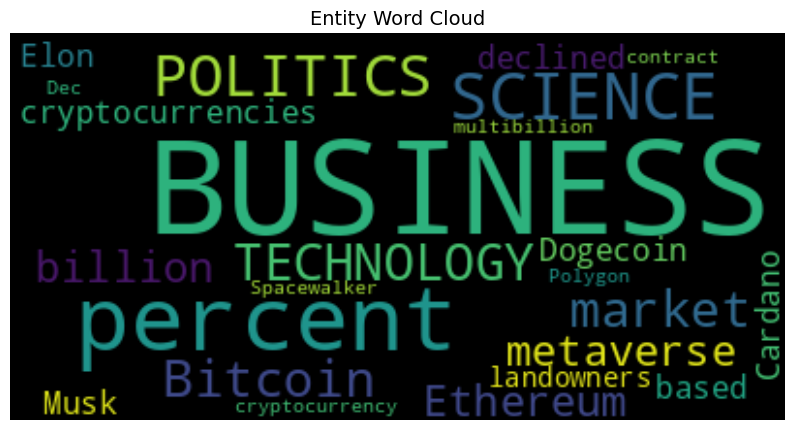

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of tuples with (entity_text, category)
entity_data = [(ent.text, ent.label_) for ent in doc.ents]

# Create a string with category information
entity_strings = [f'{text} ({category})' for text, category in entity_data]

# Create the word cloud
wordcloud = WordCloud().generate(' '.join(entity_strings))

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Entity Word Cloud', fontsize=14)
plt.show()

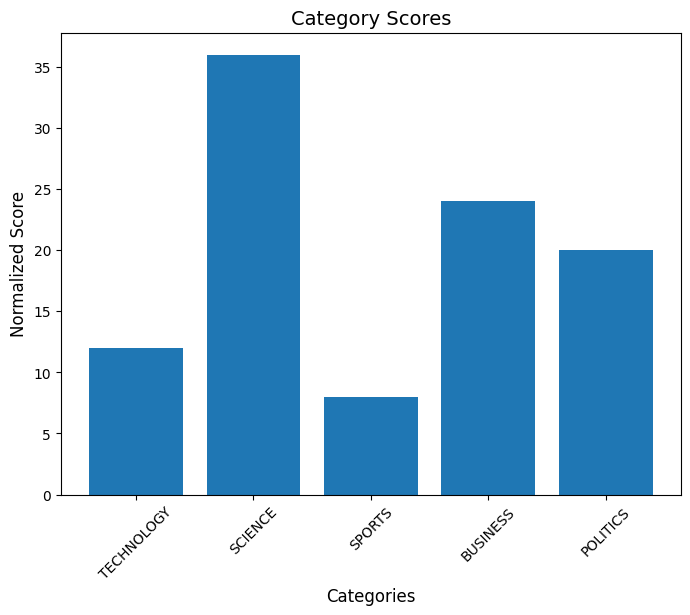

In [41]:
import matplotlib.pyplot as plt

categories = ['TECHNOLOGY', 'SCIENCE', 'SPORTS', 'BUSINESS', 'POLITICS']
scores = list(normalized_scores.values())

plt.figure(figsize=(8, 6))
plt.bar(categories, scores)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Normalized Score', fontsize=12)
plt.title('Category Scores', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

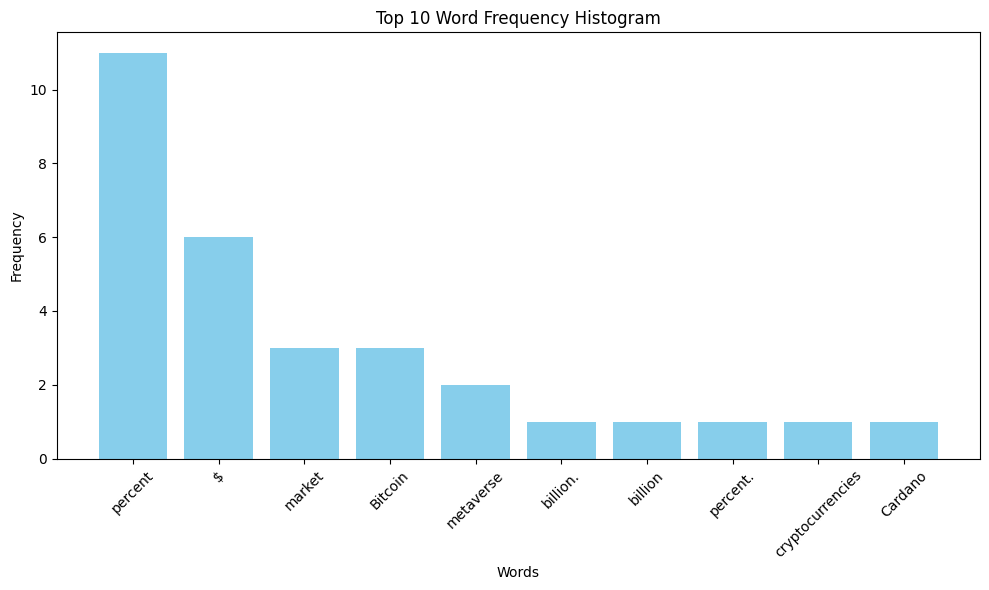

In [44]:
from collections import Counter
import matplotlib.pyplot as plt

# Extract text of entities
entity_text = [ent[0] for ent in entity_data]

# Tokenize text into words
words = ' '.join(entity_text).split()

# Count word frequencies
word_counts = Counter(words)

# Sort word counts in descending order and select top 10 words
top_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:10])

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values(), color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Word Frequency Histogram')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


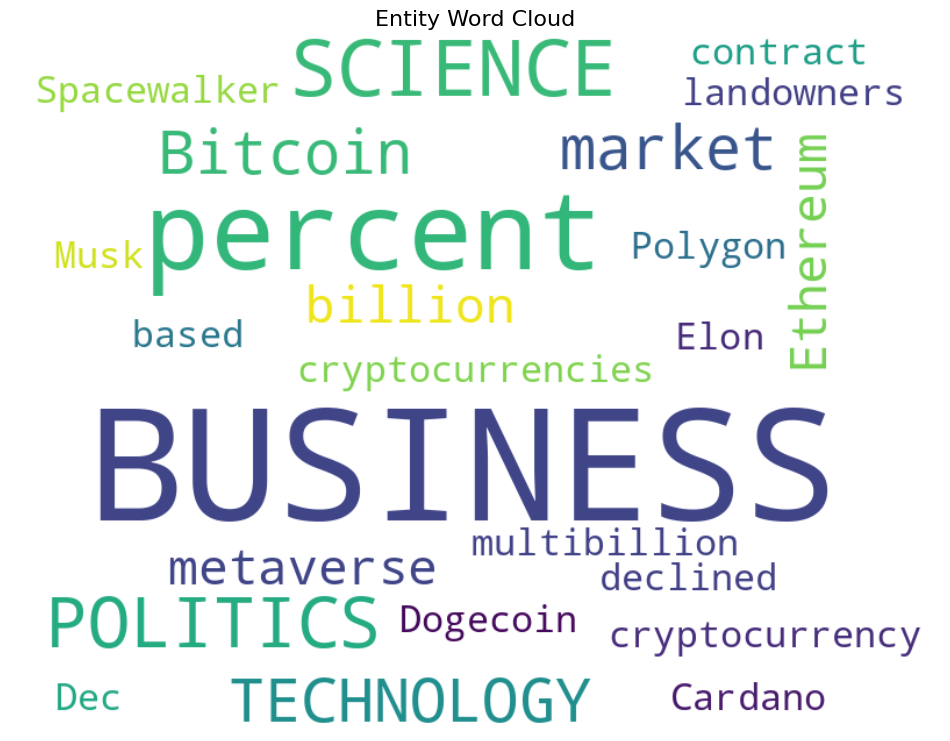

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of tuples with (entity_text, category)
entity_data = [(ent.text, ent.label_) for ent in doc.ents]

# Create a string with category information
entity_strings = [f'{text} ({category})' for text, category in entity_data]

# Define word cloud parameters
wordcloud_params = {
    'background_color': 'white',     # Set background color to white
    'max_words': 200,                # Limit maximum number of words
    'collocations': False,           # Disable collocations to avoid duplicate words
    'width': 800,                    # Set width of word cloud
    'height': 600,                   # Set height of word cloud
    'margin': 10                     # Set margin around word cloud
}

# Create the word cloud
wordcloud = WordCloud(**wordcloud_params).generate(' '.join(entity_strings))

# Plot the word cloud
plt.figure(figsize=(12, 10))        # Adjust figure size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Entity Word Cloud', fontsize=16)  # Increase title font size
plt.show()

### EXPERIMENTAL CODING FROM HERE ON OUT.....

In [ ]:
from spacy.training import Example

def create_text_classification_pipeline(nlp, categories):
    """
    This function creates a text classification pipeline for the given categories.

    Args:
        nlp: The spaCy NLP object.
        categories: The list of categories for classification.

    Returns:
        The nlp object with the added text classification pipeline.
    """
    if "textcat" not in nlp.pipe_names:
        textcat = nlp.add_pipe("textcat")
        for cat in categories:
            textcat.add_label(cat)
        nlp.add_pipe(str(textcat), last=True)

    return nlp

In [ ]:
training_data = create_text_classification_pipeline(nlp, categories=['POLITICS', 'SPORTS', 'TECHNOLOGY', 'BUSINESS', 'SCIENCE'])

ValueError: [E002] Can't find factory for '<spacy.pipeline.textcat.TextCategorizer object at 0x7d0c2224a740>' for language English (en). This usually happens when spaCy calls `nlp.create_pipe` with a custom component name that's not registered on the current language class. If you're using a custom component, make sure you've added the decorator `@Language.component` (for function components) or `@Language.factory` (for class components).

Available factories: attribute_ruler, tok2vec, merge_noun_chunks, merge_entities, merge_subtokens, token_splitter, doc_cleaner, parser, beam_parser, lemmatizer, trainable_lemmatizer, entity_linker, entity_ruler, tagger, morphologizer, ner, beam_ner, senter, sentencizer, spancat, spancat_singlelabel, span_finder, future_entity_ruler, span_ruler, textcat, textcat_multilabel, en.lemmatizer

In [ ]:
def train_text_classification_model(nlp, training_data):
    """
    This function trains the text classification model on the provided data.

    Args:
        nlp: The spaCy NLP object with the text classification pipeline.
        training_data: A list of tuples (text, category) for training.

    Returns:
        The trained nlp object.
    """
    textcat = nlp.get_pipe("textcat")
    optimizer = nlp.begin_training()

    for text, category in training_data:
        doc = nlp.make_doc(text)
        if category not in textcat.labels:
            raise ValueError(f"Category '{category}' not defined in the model")

        gold_dict = {"cats": {category: 1.0}}
        example = Example.from_dict(doc, gold_dict)
        textcat.update([example], drop=0.2, sgd=optimizer)

    nlp.end_training()
    return nlp

In [ ]:
politics = """
I'm sure you had better things to do on Saturday evening than watch Donald Trump rant for nearly two hours to an audience of cheering fans in Rome, Georgia.
His speech was rambling, unhinged, vituperative, and oh-so-revealing. In his first rally since effectively clinching the Republican Presidential nomination,
Trump made what amounted to his response to Joe Biden’s State of the Union address. It’s hard to imagine a better or more pointed contrast with the vision that,
 two days earlier, the President had laid out for America.

And yet, like so much about Trump’s 2024 campaign, this insane oration was largely overlooked and under-covered, the flood of lies and B.S. seen
as old news from a candidate whose greatest political success has been to acclimate a large swath of the population to his ever more dangerous alternate reality.
No wonder Biden, trapped in a real world of real problems that defy easy solutions, is struggling to defeat him.


This is partly a category error. Though we persist in treating the 2024 election as a race between an incumbent and a challenger,
 it is not that so much as a contest between two incumbents: Biden, the actual President, and Trump, the forever-President of Red America’s fever dreams.
 But Trump, while he presents himself as the country’s rightful leader, gets nothing like the intense scrutiny for his speeches that is now focussed on the current
  occupant of the Oval Office. The norms and traditions that Trump is intent on smashing are, once again, benefitting him.

Consider the enormous buildup before, and wall-to-wall coverage of, Biden’s annual address to Congress. It was big news when the
President called out his opponent in unusually scathing terms, referring thirteen times in his prepared text to “my predecessor” in what was,
 understandably, seen as a break with tradition. Republican commentators grumbled about the sharply partisan tone of the President’s remarks
 and the loud decibel in which he delivered them; Democrats essentially celebrated those same qualities.
"""

technology = """"
 1. Big Data Is Boosting Intelligent Behavior in Machines
Machine learning (ML) and artificial intelligence (AI) are becoming dominant problem-solving techniques in many areas of research and industry,
not least because of the recent successes of deep learning (DL). However, the equation AI=ML=DL, as recently suggested in the news, blogs, and media,
falls too short. These fields share the same fundamental hypotheses: computation is a useful way to model intelligent behavior in machines.
What kind of computation and how to program it? This is not the right question. Computation neither rules out search, logical, and probabilistic techniques,
 nor (deep) (un)supervised and reinforcement learning methods, among others, as computational models do include all of them. They complement each other,
 and the next breakthrough lies not only in pushing each of them but also in combining them.

Big Data is no fad. The world is growing at an exponential rate and so is the size of the data collected across the globe.
Data is becoming more meaningful and contextually relevant, breaking new grounds for machine learning (ML), in particular for deep learning (DL)
and artificial intelligence (AI), moving them out of research labs into production (Jordan and Mitchell, 2015). The problem has shifted from
collecting massive amounts of data to understanding it—turning it into knowledge, conclusions, and actions. Multiple research disciplines,
from cognitive sciences to biology, finance, physics, and social sciences, as well as many companies believe that data-driven and “intelligent”
solutions are necessary to solve many of their key problems. High-throughput genomic and proteomic experiments can be used to enable personalized medicine.
Large data sets of search queries can be used to improve information retrieval. Historical climate data can be used to understand global warming and to
better predict weather. Large amounts of sensor readings and hyperspectral images of plants can be used to identify drought conditions and to gain insights
into when and how stress impacts plant growth and development and in turn how to counterattack the problem of world hunger. Game data can turn pixels
into actions within video games, while observational data can help enable robots to understand complex and unstructured environments and to learn manipulation skills.

However, is AI, ML, and DL really synonymous, as recently suggested in the news, blogs, and media?
For example, when AlphaGo (Silver et al., 2016) defeated South Korean Master Lee Se-dol in the board game Go in 2016,
the terms AI, ML, and DL were used by the media to describe how AlphaGo won. In addition to this, even Gartner's list
(Panetta, 2017) of top 10 Strategic Trends for 2018 places (narrow) AI at the very top, specifying it as
“consisting of highly scoped machine-learning solutions that target a specific task.”


Black holes are some of the strangest and most fascinating objects in space. They're extremely dense, with such strong gravitational
attraction that not even light can escape their grasp.

The Milky Way could contain over 100 million black holes, though detecting these gluttonous beasts is very difficult.
 At the heart of the Milky Way lies a supermassive black hole — Sagittarius A*. The colossal structure is about 4 million
 times the mass of the sun and lies approximately 26,000 light-years away from Earth, according to a statement from NASA.

The first image of a black hole was captured in 2019 by the Event Horizon Telescope (EHT) collaboration. The striking photo
of the black hole at the center of the M87 galaxy 55 million light-years from Earth thrilled scientists around the world.
"""

science = """
Quantum physics is the study of matter and energy at the most fundamental level. It aims to uncover the properties and behaviors of the very building blocks of nature.

While many quantum experiments examine very small objects, such as electrons and photons, quantum phenomena are all around us,
acting on every scale. However, we may not be able to detect them easily in larger objects. This may give the wrong impression that
 quantum phenomena are bizarre or otherworldly. In fact, quantum science closes gaps in our knowledge of physics to give us a more
 complete picture of our everyday lives.

Quantum discoveries have been incorporated into our foundational understanding of materials, chemistry, biology, and astronomy.
These discoveries are a valuable resource for innovation, giving rise to devices such as lasers and transistors, and enabling real progress
 on technologies once considered purely speculative, such as quantum computers. Physicists are exploring the potential of quantum science to
 transform our view of gravity and its connection to space and time. Quantum science may even reveal how everything in the universe
 (or in multiple universes) is connected to everything else through higher dimensions that our senses cannot comprehend.
"""

business = """
Warren Buffett: The Making of an American Capitalist, Roger Lowenstein (New York: Random House, 1995).

Roger Lowenstein begins his new biography of Warren Buffett with a disclaimer. He reveals that he is a
longtime investor in Berkshire Hathaway, the company that under Buffett’s guidance has seen its share price rise
in 33 years from $7.60 to approximately $30,000.

In reviewing Lowenstein’s book, I must begin with a disclaimer, too. I can’t be neutral or dispassionate about Warren Buffett,
because we’re close friends. We recently vacationed together in China with our wives. I think his jokes are all funny.
I think his dietary practices—lots of burgers and Cokes—are excellent. In short, I’m a fan.
"""

sports = """
Phoenix Suns shooting guard Devin Booker has already established himself
 as one of the best players in the league, and perhaps already one of the best in franchise history.

When it comes to his status in the all-time ranks, there's still plenty of work to do.
A championship would help bolster his resume, and that could very well happen this season
after a handful of moves have elevated Phoenix to official "championship or now" status -
 if they weren't there already.

It's unknown precisely where the two were at or what they were talking about, though it's always nice to see two greats show love to each other.

Despite Phoenix's most recent early exit in the postseason,
Booker captured the attention of the entire basketball world by putting himself in Jordan's
company by becoming the first player since 23 himself back in 1992 to average a minimum of 35 points
a game over the first eight games of a postseason.
"""

training_data = [
    (politics, "POLITICS"),
    (sports, "SPORTS"),
    (technology, "TECHNOLOGY"),
    (business, "BUSINESS"),
    (science, "SCIENCE")
]


In [ ]:
train_text_classification_model(nlp,training_data)

AttributeError: 'English' object has no attribute 'end_training'

In [ ]:
def classify_text(nlp, text):
  """
  This function classifies a new piece of text into a category.

  Args:
      nlp: The trained spaCy NLP object.
      text: The text to classify.

  Returns:
      A dictionary containing the category and its probability score.
  """
  # Preprocess the text
  processed_text = preprocess_text(text)
  doc = nlp(processed_text)

  # Get the classification results
  category = doc.cats.most_probable(1)[0][0]
  score = doc.cats.most_probable(1)[0][1]

  return {"category": category, "score": score}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Load your dataset (X is the text data, y is the labels)
X = [
    """
    I'm sure you had better things to do on Saturday evening than watch Donald Trump rant for nearly two hours to an audience of cheering fans in Rome, Georgia.
    His speech was rambling, unhinged, vituperative, and oh-so-revealing. In his first rally since effectively clinching the Republican Presidential nomination,
    Trump made what amounted to his response to Joe Biden’s State of the Union address. It’s hard to imagine a better or more pointed contrast with the vision that,
    two days earlier, the President had laid out for America.

    And yet, like so much about Trump’s 2024 campaign, this insane oration was largely overlooked and under-covered, the flood of lies and B.S. seen
    as old news from a candidate whose greatest political success has been to acclimate a large swath of the population to his ever more dangerous alternate reality.
    No wonder Biden, trapped in a real world of real problems that defy easy solutions, is struggling to defeat him.


    This is partly a category error. Though we persist in treating the 2024 election as a race between an incumbent and a challenger,
    it is not that so much as a contest between two incumbents: Biden, the actual President, and Trump, the forever-President of Red America’s fever dreams.
    But Trump, while he presents himself as the country’s rightful leader, gets nothing like the intense scrutiny for his speeches that is now focussed on the current
    occupant of the Oval Office. The norms and traditions that Trump is intent on smashing are, once again, benefitting him.

    Consider the enormous buildup before, and wall-to-wall coverage of, Biden’s annual address to Congress. It was big news when the
    President called out his opponent in unusually scathing terms, referring thirteen times in his prepared text to “my predecessor” in what was,
    understandably, seen as a break with tradition. Republican commentators grumbled about the sharply partisan tone of the President’s remarks
    and the loud decibel in which he delivered them; Democrats essentially celebrated those same qualities.
    """,

    """
    1. Big Data Is Boosting Intelligent Behavior in Machines
    Machine learning (ML) and artificial intelligence (AI) are becoming dominant problem-solving techniques in many areas of research and industry,
    not least because of the recent successes of deep learning (DL). However, the equation AI=ML=DL, as recently suggested in the news, blogs, and media,
    falls too short. These fields share the same fundamental hypotheses: computation is a useful way to model intelligent behavior in machines.
    What kind of computation and how to program it? This is not the right question. Computation neither rules out search, logical, and probabilistic techniques,
    nor (deep) (un)supervised and reinforcement learning methods, among others, as computational models do include all of them. They complement each other,
    and the next breakthrough lies not only in pushing each of them but also in combining them.

    Big Data is no fad. The world is growing at an exponential rate and so is the size of the data collected across the globe.
    Data is becoming more meaningful and contextually relevant, breaking new grounds for machine learning (ML), in particular for deep learning (DL)
    and artificial intelligence (AI), moving them out of research labs into production (Jordan and Mitchell, 2015). The problem has shifted from
    collecting massive amounts of data to understanding it—turning it into knowledge, conclusions, and actions. Multiple research disciplines,
    from cognitive sciences to biology, finance, physics, and social sciences, as well as many companies believe that data-driven and “intelligent”
    solutions are necessary to solve many of their key problems. High-throughput genomic and proteomic experiments can be used to enable personalized medicine.
    Large data sets of search queries can be used to improve information retrieval. Historical climate data can be used to understand global warming and to
    better predict weather. Large amounts of sensor readings and hyperspectral images of plants can be used to identify drought conditions and to gain insights
    into when and how stress impacts plant growth and development and in turn how to counterattack the problem of world hunger. Game data can turn pixels
    into actions within video games, while observational data can help enable robots to understand complex and unstructured environments and to learn manipulation skills.

    However, is AI, ML, and DL really synonymous, as recently suggested in the news, blogs, and media?
    For example, when AlphaGo (Silver et al., 2016) defeated South Korean Master Lee Se-dol in the board game Go in 2016,
    the terms AI, ML, and DL were used by the media to describe how AlphaGo won. In addition to this, even Gartner's list
    (Panetta, 2017) of top 10 Strategic Trends for 2018 places (narrow) AI at the very top, specifying it as
    “consisting of highly scoped machine-learning solutions that target a specific task.”
    """,

    """
    Black holes are some of the strangest and most fascinating objects in space. They're extremely dense, with such strong gravitational
    attraction that not even light can escape their grasp.

    The Milky Way could contain over 100 million black holes, though detecting these gluttonous beasts is very difficult.
    At the heart of the Milky Way lies a supermassive black hole — Sagittarius A*. The colossal structure is about 4 million
    times the mass of the sun and lies approximately 26,000 light-years away from Earth, according to a statement from NASA.

    The first image of a black hole was captured in 2019 by the Event Horizon Telescope (EHT) collaboration. The striking photo
    of the black hole at the center of the M87 galaxy 55 million light-years from Earth thrilled scientists around the world.

    Quantum physics is the study of matter and energy at the most fundamental level. It aims to uncover the properties and behaviors of the very building blocks of nature.

    While many quantum experiments examine very small objects, such as electrons and photons, quantum phenomena are all around us,
    acting on every scale. However, we may not be able to detect them easily in larger objects. This may give the wrong impression that
    quantum phenomena are bizarre or otherworldly. In fact, quantum science closes gaps in our knowledge of physics to give us a more
    complete picture of our everyday lives.

    Quantum discoveries have been incorporated into our foundational understanding of materials, chemistry, biology, and astronomy.
    These discoveries are a valuable resource for innovation, giving rise to devices such as lasers and transistors, and enabling real progress
    on technologies once considered purely speculative, such as quantum computers. Physicists are exploring the potential of quantum science to
    transform our view of gravity and its connection to space and time. Quantum science may even reveal how everything in the universe
    (or in multiple universes) is connected to everything else through higher dimensions that our senses cannot comprehend.
    """,

    """
    Phoenix Suns shooting guard Devin Booker has already established himself
    as one of the best players in the league, and perhaps already one of the best in franchise history.

    When it comes to his status in the all-time ranks, there's still plenty of work to do.
    A championship would help bolster his resume, and that could very well happen this season
    after a handful of moves have elevated Phoenix to official "championship or now" status -
    if they weren't there already.

    It's unknown precisely where the two were at or what they were talking about, though it's always nice to see two greats show love to each other.

    Despite Phoenix's most recent early exit in the postseason,
    Booker captured the attention of the entire basketball world by putting himself in Jordan's
    company by becoming the first player since 23 himself back in 1992 to average a minimum of 35 points
    a game over the first eight games of a postseason.
    """,

    """
    Warren Buffett: The Making of an American Capitalist, Roger Lowenstein (New York: Random House, 1995).

    Roger Lowenstein begins his new biography of Warren Buffett with a disclaimer. He reveals that he is a
    longtime investor in Berkshire Hathaway, the company that under Buffett’s guidance has seen its share price rise
    in 33 years from $7.60 to approximately $30,000.

    In reviewing Lowenstein’s book, I must begin with a disclaimer, too. I can’t be neutral or dispassionate about Warren Buffett,
    because we’re close friends. We recently vacationed together in China with our wives. I think his jokes are all funny.
    I think his dietary practices—lots of burgers and Cokes—are excellent. In short, I’m a fan.
    """
]  # List of article texts

y = ["Politics", "Technology", "Science", "Sports", "Business"]  # List of corresponding category labels

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

# Train a linear SVM model
model = LinearSVC()
model.fit(X_train_vec, y_train)

# Evaluate on the validation set
val_accuracy = model.score(X_val_vec, y_val)
print(f"Validation accuracy: {val_accuracy}")


Validation accuracy: 0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
import numpy as np


In [ ]:
X = [
    """
    I'm sure you had better things to do on Saturday evening than watch Donald Trump rant for nearly two hours to an audience of cheering fans in Rome, Georgia.
    His speech was rambling, unhinged, vituperative, and oh-so-revealing. In his first rally since effectively clinching the Republican Presidential nomination,
    Trump made what amounted to his response to Joe Biden’s State of the Union address. It’s hard to imagine a better or more pointed contrast with the vision that,
    two days earlier, the President had laid out for America.

    And yet, like so much about Trump’s 2024 campaign, this insane oration was largely overlooked and under-covered, the flood of lies and B.S. seen
    as old news from a candidate whose greatest political success has been to acclimate a large swath of the population to his ever more dangerous alternate reality.
    No wonder Biden, trapped in a real world of real problems that defy easy solutions, is struggling to defeat him.


    This is partly a category error. Though we persist in treating the 2024 election as a race between an incumbent and a challenger,
    it is not that so much as a contest between two incumbents: Biden, the actual President, and Trump, the forever-President of Red America’s fever dreams.
    But Trump, while he presents himself as the country’s rightful leader, gets nothing like the intense scrutiny for his speeches that is now focussed on the current
    occupant of the Oval Office. The norms and traditions that Trump is intent on smashing are, once again, benefitting him.

    Consider the enormous buildup before, and wall-to-wall coverage of, Biden’s annual address to Congress. It was big news when the
    President called out his opponent in unusually scathing terms, referring thirteen times in his prepared text to “my predecessor” in what was,
    understandably, seen as a break with tradition. Republican commentators grumbled about the sharply partisan tone of the President’s remarks
    and the loud decibel in which he delivered them; Democrats essentially celebrated those same qualities.
    """,

    """
    1. Big Data Is Boosting Intelligent Behavior in Machines
    Machine learning (ML) and artificial intelligence (AI) are becoming dominant problem-solving techniques in many areas of research and industry,
    not least because of the recent successes of deep learning (DL). However, the equation AI=ML=DL, as recently suggested in the news, blogs, and media,
    falls too short. These fields share the same fundamental hypotheses: computation is a useful way to model intelligent behavior in machines.
    What kind of computation and how to program it? This is not the right question. Computation neither rules out search, logical, and probabilistic techniques,
    nor (deep) (un)supervised and reinforcement learning methods, among others, as computational models do include all of them. They complement each other,
    and the next breakthrough lies not only in pushing each of them but also in combining them.

    Big Data is no fad. The world is growing at an exponential rate and so is the size of the data collected across the globe.
    Data is becoming more meaningful and contextually relevant, breaking new grounds for machine learning (ML), in particular for deep learning (DL)
    and artificial intelligence (AI), moving them out of research labs into production (Jordan and Mitchell, 2015). The problem has shifted from
    collecting massive amounts of data to understanding it—turning it into knowledge, conclusions, and actions. Multiple research disciplines,
    from cognitive sciences to biology, finance, physics, and social sciences, as well as many companies believe that data-driven and “intelligent”
    solutions are necessary to solve many of their key problems. High-throughput genomic and proteomic experiments can be used to enable personalized medicine.
    Large data sets of search queries can be used to improve information retrieval. Historical climate data can be used to understand global warming and to
    better predict weather. Large amounts of sensor readings and hyperspectral images of plants can be used to identify drought conditions and to gain insights
    into when and how stress impacts plant growth and development and in turn how to counterattack the problem of world hunger. Game data can turn pixels
    into actions within video games, while observational data can help enable robots to understand complex and unstructured environments and to learn manipulation skills.

    However, is AI, ML, and DL really synonymous, as recently suggested in the news, blogs, and media?
    For example, when AlphaGo (Silver et al., 2016) defeated South Korean Master Lee Se-dol in the board game Go in 2016,
    the terms AI, ML, and DL were used by the media to describe how AlphaGo won. In addition to this, even Gartner's list
    (Panetta, 2017) of top 10 Strategic Trends for 2018 places (narrow) AI at the very top, specifying it as
    “consisting of highly scoped machine-learning solutions that target a specific task.”
    """,

    """
    Black holes are some of the strangest and most fascinating objects in space. They're extremely dense, with such strong gravitational
    attraction that not even light can escape their grasp.

    The Milky Way could contain over 100 million black holes, though detecting these gluttonous beasts is very difficult.
    At the heart of the Milky Way lies a supermassive black hole — Sagittarius A*. The colossal structure is about 4 million
    times the mass of the sun and lies approximately 26,000 light-years away from Earth, according to a statement from NASA.

    The first image of a black hole was captured in 2019 by the Event Horizon Telescope (EHT) collaboration. The striking photo
    of the black hole at the center of the M87 galaxy 55 million light-years from Earth thrilled scientists around the world.

    Quantum physics is the study of matter and energy at the most fundamental level. It aims to uncover the properties and behaviors of the very building blocks of nature.

    While many quantum experiments examine very small objects, such as electrons and photons, quantum phenomena are all around us,
    acting on every scale. However, we may not be able to detect them easily in larger objects. This may give the wrong impression that
    quantum phenomena are bizarre or otherworldly. In fact, quantum science closes gaps in our knowledge of physics to give us a more
    complete picture of our everyday lives.

    Quantum discoveries have been incorporated into our foundational understanding of materials, chemistry, biology, and astronomy.
    These discoveries are a valuable resource for innovation, giving rise to devices such as lasers and transistors, and enabling real progress
    on technologies once considered purely speculative, such as quantum computers. Physicists are exploring the potential of quantum science to
    transform our view of gravity and its connection to space and time. Quantum science may even reveal how everything in the universe
    (or in multiple universes) is connected to everything else through higher dimensions that our senses cannot comprehend.
    """,

    """
    Phoenix Suns shooting guard Devin Booker has already established himself
    as one of the best players in the league, and perhaps already one of the best in franchise history.

    When it comes to his status in the all-time ranks, there's still plenty of work to do.
    A championship would help bolster his resume, and that could very well happen this season
    after a handful of moves have elevated Phoenix to official "championship or now" status -
    if they weren't there already.

    It's unknown precisely where the two were at or what they were talking about, though it's always nice to see two greats show love to each other.

    Despite Phoenix's most recent early exit in the postseason,
    Booker captured the attention of the entire basketball world by putting himself in Jordan's
    company by becoming the first player since 23 himself back in 1992 to average a minimum of 35 points
    a game over the first eight games of a postseason.
    """,

    """
    Warren Buffett: The Making of an American Capitalist, Roger Lowenstein (New York: Random House, 1995).

    Roger Lowenstein begins his new biography of Warren Buffett with a disclaimer. He reveals that he is a
    longtime investor in Berkshire Hathaway, the company that under Buffett’s guidance has seen its share price rise
    in 33 years from $7.60 to approximately $30,000.

    In reviewing Lowenstein’s book, I must begin with a disclaimer, too. I can’t be neutral or dispassionate about Warren Buffett,
    because we’re close friends. We recently vacationed together in China with our wives. I think his jokes are all funny.
    I think his dietary practices—lots of burgers and Cokes—are excellent. In short, I’m a fan.
    """
]  # List of article texts

y = ["Sports", "Business", "Technology", "Politics", "Science"]  # List of corresponding category labels

In [ ]:
X = [
    # Sports
    """
    The NBA playoffs are in full swing, with teams battling it out for a chance at the championship title.
    In the latest game between the Lakers and the Warriors, tensions ran high as both teams fought tooth and nail
    to secure a spot in the next round. LeBron James led the Lakers with an impressive performance, scoring
    a career-high 50 points and leading his team to victory in overtime. Meanwhile, Stephen Curry put on a
    dazzling display of three-point shooting for the Warriors, but ultimately fell short as the Lakers emerged
    victorious. With the series tied at 2-2, the stage is set for an epic showdown in the next game.

    As the NFL season heats up, teams are making moves to strengthen their rosters for the upcoming playoffs.
    The Dallas Cowboys made headlines with a blockbuster trade, acquiring star wide receiver Amari Cooper
    from the Oakland Raiders in exchange for a first-round draft pick. The move bolsters the Cowboys'
    receiving corps and gives quarterback Dak Prescott a valuable weapon in the passing game.
    Fans are eager to see how Cooper will fit into the team's offense and whether he can help lead
    the Cowboys to postseason success.
    """,

    # Business
    """
    In the world of finance, volatility remains a key concern for investors as global markets continue
    to navigate uncertain economic conditions. Analysts are closely monitoring the impact of geopolitical
    tensions, inflationary pressures, and supply chain disruptions on stock prices and market stability.
    Despite these challenges, savvy investors are identifying opportunities in sectors such as technology,
    renewable energy, and healthcare, where long-term growth prospects remain strong. As companies adapt
    to the changing landscape, innovation and strategic decision-making will be critical to navigating
    the road ahead.

    The rise of e-commerce has transformed the retail industry, reshaping consumer shopping habits and
    challenging traditional brick-and-mortar stores. Online retailers like Amazon have capitalized on
    the convenience and accessibility of digital shopping, offering a wide range of products and
    services at competitive prices. In response, traditional retailers are embracing digital
    technologies and omnichannel strategies to enhance the customer experience and stay
    competitive in the digital age. With the holiday season approaching, retailers are
    gearing up for a surge in online shopping and implementing measures to meet
    the demands of tech-savvy consumers.
    """,

    # Technology
    """
    Artificial intelligence (AI) continues to revolutionize various industries, from healthcare
    and finance to transportation and entertainment. Advances in machine learning algorithms
    and deep neural networks have enabled AI systems to perform complex tasks previously
    thought impossible for machines. Companies are leveraging AI-powered solutions
    for predictive analytics, natural language processing, and computer vision
    to gain insights, automate processes, and drive innovation. As AI
    technology continues to evolve, its potential to
    transform society and reshape the future
    is limitless.
    The rapid pace of technological innovation has led to the proliferation of smart devices
    and the Internet of Things (IoT) ecosystem. Smartphones, smartwatches, and smart
    home devices have become ubiquitous in today's interconnected world,
    enabling seamless communication, automation, and control
    of everyday tasks. With the advent of 5G technology,
    the IoT landscape is poised for further growth
    and expansion, unlocking new opportunities
    for connectivity, efficiency, and
    convenience across various
    industries and sectors.
    """,

    # Politics
    """
    The political landscape is heating up as the midterm elections approach, with candidates
    vying for control of Congress and state legislatures across the country. Key issues
    such as healthcare, immigration, and economic recovery are dominating the
    campaign trail as candidates seek to rally support and mobilize voters.
    With the balance of power at stake, political parties are deploying
    extensive resources and strategies to secure electoral victories
    and shape the direction of policy in the years to come.
    Diplomatic tensions are escalating between major world powers as geopolitical
    rivalries intensify and strategic interests clash. The United States, China,
    and Russia are engaged in a geopolitical competition for influence and
    dominance in key regions such as the Indo-Pacific, Eastern Europe,
    and the Arctic. Rising tensions over trade, territorial disputes,
    and military posturing have raised concerns about the
    prospect of armed conflict and the stability of
    the international order in the 21st century.
    """,

    # Science
    """
    Breakthroughs in biomedical research are paving the way for new treatments
    and therapies to combat diseases and improve human health. Scientists
    are making strides in understanding the genetic basis of diseases
    such as cancer, Alzheimer's, and diabetes, leading to the
    development of targeted therapies and personalized
    medicine approaches. Advances in gene editing
    technologies like CRISPR-Cas9 are revolutionizing
    the field of genetics and holding promise
    for curing genetic disorders and
    transforming the future of
    medicine.
    Climate change remains one of the greatest challenges facing humanity,
    with rising global temperatures, extreme weather events, and
    environmental degradation threatening ecosystems and
    biodiversity. Scientists warn of the urgent need
    for decisive action to reduce greenhouse gas
    emissions, transition to renewable energy
    sources, and mitigate the impacts of
    climate change on vulnerable
    communities and ecosystems.
    As countries work
    towards achieving
    carbon neutrality
    and sustainability,
    collaboration and
    innovation will be
    crucial in
    addressing
    this
    existential
    threat.
    """
]

y = ["Sports", "Business", "Technology", "Politics", "Science"]


In [ ]:
# Function to oversample minority classes
def resample_data(X, y):
    unique, counts = np.unique(y, return_counts=True)
    class_weights = dict(zip(unique, 1.0 / counts))

    X_resampled = []
    y_resampled = []

    for label, samples in zip(unique, [X[y == l] for l in unique]):
        weights = [class_weights[label] for _ in range(len(samples))]
        X_resampled.extend(resample(samples, n_samples=max(counts), replace=True, weights=weights))
        y_resampled.extend([label] * max(counts))

    return X_resampled, y_resampled

In [ ]:
!pip install imblearn

In [ ]:
! pip install imbalanced-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Function to oversample minority classes
def resample_data(X, y):
    unique, counts = np.unique(y, return_counts=True)
    class_weights = dict(zip(unique, 1.0 / counts))

    X_resampled = []
    y_resampled = []

    for label, samples in zip(unique, [X[y == l] for l in unique]):
        weights = [class_weights[label] for _ in range(len(samples))]
        X_resampled.extend(resample(samples, n_samples=max(counts), replace=True, weights=weights))
        y_resampled.extend([label] * max(counts))

    return X_resampled, y_resampled

# Perform oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Text preprocessing pipeline
text_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
])

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Combine preprocessing and model in a pipeline
pipeline = Pipeline([
    ('preprocess', text_pipeline),
    ('classifier', rf_model)
])

# Convert NumPy arrays to lists of strings
X_train = X_train.ravel().tolist()
X_val = X_val.ravel().tolist()

# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate on the validation set
val_accuracy = pipeline.score(X_val, y_val)
print(f"Validation accuracy: {val_accuracy}")


Validation accuracy: 0.0


In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('vectorizer',
                                  TfidfVectorizer(ngram_range=(1, 2)))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
val_accuracy = pipeline.score(X_val, y_val)

In [ ]:
val_accuracy

0.0

In [ ]:
# Example of new data
new_data = ["Warren buffet", "Warren buffet is working on stock trading"]

# Make predictions on new data
predictions = pipeline.predict(new_data)

# Print the predictions
for doc, prediction in zip(new_data, predictions):
    print(f"Document: {doc}")
    print(f"Predicted label: {prediction}")
    print()

Document: Warren buffet
Predicted label: Sports

Document: Warren buffet is working on stock trading
Predicted label: Sports



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout


# Convert labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform length
max_seq_length = 100  # Define the maximum sequence length
X_padded = pad_sequences(X_sequences, maxlen=max_seq_length)

# Convert labels to categorical
num_classes = len(set(y_encoded))
y_categorical = np.zeros((len(y_encoded), num_classes))
for i, label in enumerate(y_encoded):
    y_categorical[i, label] = 1

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=42)

# Define the model architecture...)

# Define the model
embedding_dim = 100  # Define the dimensionality of word embeddings
num_filters = 128  # Number of filters in the convolutional layer
filter_sizes = [3, 4, 5]  # Sizes of filters in the convolutional layer

model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_seq_length),
    Dropout(0.5),
    *[Conv1D(num_filters, kernel_size, activation='relu') for kernel_size in filter_sizes],
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation loss: {val_loss}, Validation accuracy: {val_accuracy}")


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 1.6542 - accuracy: 0.0000e+00 - val_loss: 1.6093 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 53ms/step - loss: 1.6048 - accuracy: 0.2500 - val_loss: 1.6332 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 58ms/step - loss: 1.6030 - accuracy: 0.2500 - val_loss: 1.6534 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 68ms/step - loss: 1.6024 - accuracy: 0.2500 - val_loss: 1.6693 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 55ms/step - loss: 1.6028 - accuracy: 0.5000 - val_loss: 1.6882 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 66ms/step - loss: 1.5498 - accuracy: 0.5000 - val_loss: 1.7089 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 53ms/step - loss: 1.5963 - accuracy: 0.2500 - val_loss: 1.7304 - val_accuracy: 0.0000e+

In [ ]:
new_data = [
    "Warren",
    "Big Data "
]

# Tokenize the new data
new_data_sequences = tokenizer.texts_to_sequences(new_data)
new_data_padded = pad_sequences(new_data_sequences, maxlen=max_seq_length)

# Make predictions on the new data
predictions = model.predict(new_data_padded)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Decode predicted labels back to original class labels
predicted_class_labels = label_encoder.inverse_transform(predicted_labels)

# Print the predictions
for doc, label in zip(new_data, predicted_class_labels):
    print(f"Document: {doc}")
    print(f"Predicted label: {label}")
    print()

1/1 [==============================] - 0s 38ms/step
Document: Warren buffet just made a stock trade
Predicted label: Business

Document: Big Data 
Predicted label: Business



## MODEL

In [ ]:
import csv
import os
import numpy as np
y = []
X = []

header = []
file = open('training_data.csv')
csvreader = csv.reader(file)
header = next(csvreader)
#header


rows = []
for row in csvreader:
  rows.append(row)
#rows

rows = np.array(rows)

rows

#print(X)
#print(y)


array([['SPORTS',
        "The NBA playoffs are in full swing, with teams battling it out for a chance at the championship title. \n    In the latest game between the Lakers and the Warriors, tensions ran high as both teams fought tooth and nail \n    to secure a spot in the next round. LeBron James led the Lakers with an impressive performance, scoring \n    a career-high 50 points and leading his team to victory in overtime. Meanwhile, Stephen Curry put on a \n    dazzling display of three-point shooting for the Warriors, but ultimately fell short as the Lakers emerged \n    victorious. With the series tied at 2-2, the stage is set for an epic showdown in the next game.\n\n    As the NFL season heats up, teams are making moves to strengthen their rosters for the upcoming playoffs. \n    The Dallas Cowboys made headlines with a blockbuster trade, acquiring star wide receiver Amari Cooper \n    from the Oakland Raiders in exchange for a first-round draft pick. The move bolsters the Cow

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from tensorflow.keras.models import Model  # Import Model from keras.models
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, SpatialDropout1D, BatchNormalization, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import csv
import os

num_classes = 5

# Convert labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

#print(X_sequences)

# Pad sequences to ensure uniform length
max_seq_length = 300
X_padded = pad_sequences(X_sequences, maxlen=max_seq_length)

# Convert labels to one-hot encoding
label_binarizer = LabelBinarizer()
y_categorical = label_binarizer.fit_transform(y_encoded)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=42)

print(X_train)

print(X_val)

[[  0   0   0 ... 476 477 478]
 [  0   0   0 ...  78   2  61]
 [  0   0   0 ...   3 194 195]
 [  0   0   0 ...   1 405 406]]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   5   1  25   4  51 196  52
    9  26 197   6  53   8  54 198 199   3 200 201  55 202 203   7 204 205
    1 206   4  27  12 207 208   2 209 210 211  13 212  56   2 213  57 214
  215  58  59  53   7 216  60   5  61  15   8  28  62  63   2  29 217 218
  219  64 220 221 222   8  65 223   3   1 224  30  16   2  66 225  23  24
   67 226   3 227   1 228 229   1 230   4 231 232  68 233   1

In [ ]:
# Define the model architecture
embedding_dim = 128
num_filters = 128
filter_sizes = [3, 4, 5]
pool_size = 2

# Functional API approach
inputs = Input(shape=(max_seq_length,))  # Define model input

embedding = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_seq_length)(inputs)
x = SpatialDropout1D(0.2)(embedding)

conv_outputs = []
for kernel_size in filter_sizes:
    conv = Conv1D(num_filters, kernel_size, activation='relu', padding='same')(x)
    conv_outputs.append(conv)

concatenated = Concatenate(axis=-1)(conv_outputs)
x = GlobalMaxPooling1D()(concatenated)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the model using functional API
model = Model(inputs=inputs, outputs=predictions)

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Adjusted learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation loss: {val_loss}, Validation accuracy: {val_accuracy}")

In [ ]:
# Example of new data
new_data = [
    "Advances in gene editing technologies like CRISPR-Cas9 are ",
    "The NBA playoffs are in full swing, with teams battling it out for a chance at the championship title. In the latest game between the Lakers and the Warriors, tensions ran high as both teams fought tooth and nail to secure a spot in the next round"
]


In [ ]:

# Tokenize the new data
new_data_sequences = tokenizer.texts_to_sequences(new_data)
new_data_padded = pad_sequences(new_data_sequences, maxlen=max_seq_length)

# Make predictions on the new data
predictions = model.predict(new_data_padded)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Decode predicted labels back to original class labels
predicted_class_labels = label_encoder.inverse_transform(predicted_labels)

# Print the predictions
for doc, label in zip(new_data, predicted_class_labels):
    print(f"Document: {doc}")
    print(f"Predicted label: {label}")
    print()


1/1 [==============================] - 0s 122ms/step
Document: Advances in gene editing technologies like CRISPR-Cas9 are 
Predicted label: Science

Document: The NBA playoffs are in full swing, with teams battling it out for a chance at the championship title. In the latest game between the Lakers and the Warriors, tensions ran high as both teams fought tooth and nail to secure a spot in the next round
Predicted label: Science



In [ ]:
# Assuming you have the original lists X and y
expanded_X = X.copy()
expanded_y = y.copy()

# Add more samples for the "Politics" class
politics_samples = [
    "The President's approval rating has been steadily declining due to the economic downturn.",
    "Lawmakers are divided on the issue of immigration reform, with both parties holding strong opposing views.",
    "The upcoming midterm elections are expected to be a close race, with control of Congress hanging in the balance.",
    # Add more relevant samples for the "Politics" class
]
expanded_X.extend(politics_samples)
expanded_y.extend(["Politics"] * len(politics_samples))

# Add more samples for the "Technology" class
technology_samples = [
    "The latest smartphone from TechCorp features a revolutionary camera system and a powerful AI processor.",
    "Cybersecurity experts warn of a new ransomware attack targeting healthcare institutions worldwide.",
    "Quantum computing is poised to revolutionize the field of cryptography and data encryption.",
    # Add more relevant samples for the "Technology" class
]
expanded_X.extend(technology_samples)
expanded_y.extend(["Technology"] * len(technology_samples))

# Repeat the process for the remaining classes: "Science", "Sports", and "Business"

In [ ]:
# Example new data (replace with your actual unseen data) belonging to one of the classes
new_text = '''
Burns scored only four points in NC State’s Sweet 16 matchup against Marquette but made his mark on that game with seven assists. “You’re going to double-team, I’m going to do my best to make you pay,” Burns said Saturday ahead of the Duke game.

Regardless of defenders, the 6-foot-9 big man charged the Blue Devils on Sunday. A lot.

He scored NC State’s first four points, but foul trouble later in the half kept him from completely dominating.

“I wasn’t too worried about it,” Burns said postgame.

Turns out, he didn’t need to be. NC State trailed 27-21 at halftime. After that, it was all about Burns, who was named Most Outstanding Player of the South Region.

“I’m glad he’s on my team,” NC State coach Kevin Keatts said. “I don’t know how you guard him. And I hope nobody figures that out.”

NC State trailed 27-21 at halftime. After that, it was all about Burns, who was named Most Outstanding Player of the South Region.

It was the third time in the past month the two teams faced each other. In an NC State loss on March 4, Burns scored 27. In a Wolfpack victory in the ACC tournament on March 14, Burns scored only 10. On Sunday, he put it all together — big numbers and an even bigger victory — capped by a three-point play with just under a minute left.


'''

# Preprocess the new data (assuming it's a single text string)
new_texts = [new_text]  # Convert to a list for processing
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_data_padded = pad_sequences(new_sequences, maxlen=max_seq_length)

# Make predictions
predictions = model.predict(new_data_padded)

# Example: Assuming model outputs class probabilities (softmax activation)
if predictions.shape[1] > 1:  # Check if multiple classes exist
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get class with highest probability for the first item
    class_names = label_encoder.inverse_transform([predicted_class])[0]  # Decode class label using encoder
    print(f"Predicted Class: {class_names}")
else:
    predicted_class = predictions[0]  # Handle single-class case
    print(f"Predicted Class: {predicted_class}")  # Might need decoding if labels were encoded

1/1 [==============================] - 0s 178ms/step
Predicted Class: Science
